<a href="https://colab.research.google.com/github/Barky/HR-Analytics-Prediction/blob/main/placement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [129]:
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")

In [130]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [131]:
x=df.copy()
x.drop(["sl_no", "status"], axis=1, inplace = True)
y = df["status"]

In [132]:
x.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            67
dtype: int64

In [133]:
import math
for i in range(0,x.shape[0]):
  val = x["salary"][i]
  if math.isnan(val): 
    x["salary"][i] = x["salary"].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [134]:
x.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [135]:
x.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0


Gender has unique value size of  2
Gender's unique values are  ['M' 'F']


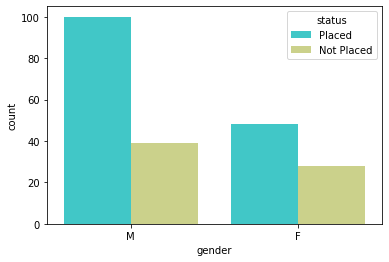

In [136]:
print("Gender has unique value size of ",len(x["gender"].unique()))
print("Gender's unique values are ",x["gender"].unique())
sns.countplot(x = 'gender',hue=y,data=x,palette='rainbow');

In [137]:
temp = pd.get_dummies(x["gender"], prefix="gender")
x = pd.concat([x, temp], axis = 1)
x.drop("gender", axis=1,inplace=True)

ssc_b has unique value size of  2
ssc_b's unique values are  ['Others' 'Central']


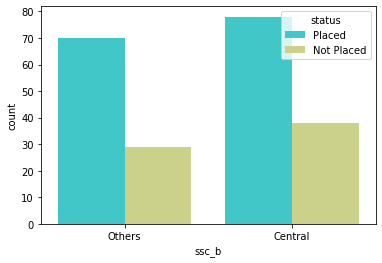

In [138]:
print("ssc_b has unique value size of ",len(x["ssc_b"].unique()))
print("ssc_b's unique values are ",x["ssc_b"].unique())
sns.countplot(x = 'ssc_b',hue=y,data=x,palette='rainbow');

In [139]:
temp = pd.get_dummies(x["ssc_b"], prefix="ssc_b")
x = pd.concat([x, temp], axis = 1)
x.drop("ssc_b", axis=1,inplace=True)

In [140]:
x.head()

,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others
0,67.00,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,0,1,0,1
1,79.33,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1,1,0
2,65.00,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,0,1,1,0
3,56.00,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,0,1,1,0
4,85.80,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,0,1,1,0


hsc_b has unique value size of  2
hsc_b's unique values are  ['Others' 'Central']


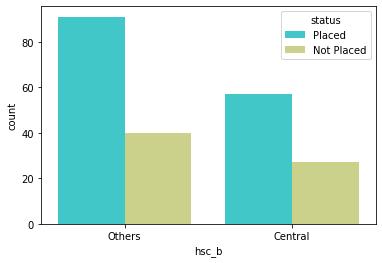

In [141]:
print("hsc_b has unique value size of ",len(x["hsc_b"].unique()))
print("hsc_b's unique values are ",x["hsc_b"].unique())
sns.countplot(x = 'hsc_b',hue=y,data=x,palette='rainbow');

In [142]:
temp = pd.get_dummies(x["hsc_b"], prefix="hsc_b")
x = pd.concat([x, temp], axis = 1)
x.drop("hsc_b", axis=1,inplace=True)

In [143]:
x.head(3)

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others
0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,0,1,0,1,0,1
1,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1,1,0,0,1
2,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,0,1,1,0,1,0


hsc_s has unique value size of  3
hsc_s's unique values are  ['Commerce' 'Science' 'Arts']


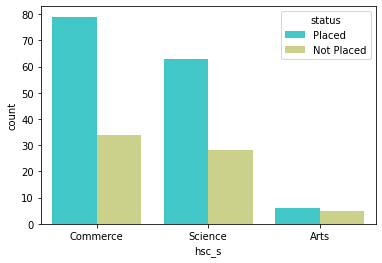

In [144]:
print("hsc_s has unique value size of ",len(x["hsc_s"].unique()))
print("hsc_s's unique values are ",x["hsc_s"].unique())
sns.countplot(x = 'hsc_s',hue=y,data=x,palette='rainbow');

In [145]:
w=0
for i in x["hsc_s"]:
  if i == "Arts":w+=1
print(w)

11


In [146]:
for i in range(0, x.shape[0]):
  if x["hsc_s"][i] == "Arts": 
    x["hsc_s"][i] = "Commerce"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
temp = pd.get_dummies(x["hsc_s"], prefix="hsc_s")
x = pd.concat([x, temp], axis = 1)
x.drop("hsc_s", axis=1,inplace=True)

In [148]:
x.head()

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science
0,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,0,1,0,1,0,1,1,0
1,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1,1,0,0,1,0,1
2,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,0,1,1,0,1,0,1,0
3,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,265000.0,0,1,1,0,1,0,0,1
4,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,0,1,1,0,1,0,1,0


degree_t has unique value size of  3
degree_t's unique values are  ['Sci&Tech' 'Comm&Mgmt' 'Others']


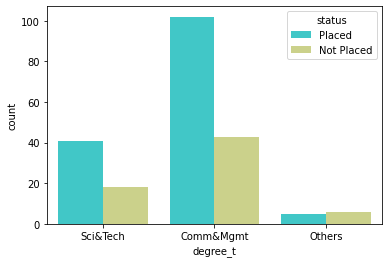

In [149]:
print("degree_t has unique value size of ",len(x["degree_t"].unique()))
print("degree_t's unique values are ",x["degree_t"].unique())
sns.countplot(x = 'degree_t',hue=y,data=x,palette='rainbow');

In [150]:
for i in range(0, x.shape[0]):
  if x["degree_t"][i] == "Others": 
    x["degree_t"][i] = "Sci&Tech"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
temp = pd.get_dummies(x["degree_t"], prefix="degree_t")
x = pd.concat([x, temp], axis = 1)
x.drop("degree_t", axis=1,inplace=True)

In [152]:
x.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,270000.0,0,1,0,1,0,1,1,0,0,1
1,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,200000.0,0,1,1,0,0,1,0,1,0,1
2,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,250000.0,0,1,1,0,1,0,1,0,1,0
3,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,265000.0,0,1,1,0,1,0,0,1,0,1
4,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,425000.0,0,1,1,0,1,0,1,0,1,0


workex has unique value size of  2
workex's unique values are  ['No' 'Yes']


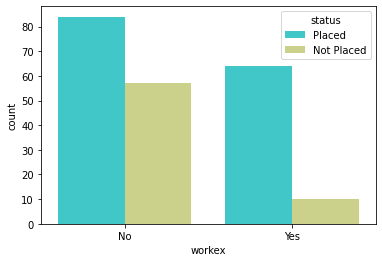

In [153]:
print("workex has unique value size of ",len(x["workex"].unique()))
print("workex's unique values are ",x["workex"].unique())
sns.countplot(x = 'workex',hue=y,data=x,palette='rainbow');

In [154]:
temp = pd.get_dummies(x["workex"], prefix="workex")
x = pd.concat([x, temp], axis = 1)
x.drop("workex", axis=1,inplace=True)

In [155]:
x.head()

,ssc_p,hsc_p,degree_p,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes
0,67.00,91.00,58.00,55.0,Mkt&HR,58.80,270000.0,0,1,0,1,0,1,1,0,0,1,1,0
1,79.33,78.33,77.48,86.5,Mkt&Fin,66.28,200000.0,0,1,1,0,0,1,0,1,0,1,0,1
2,65.00,68.00,64.00,75.0,Mkt&Fin,57.80,250000.0,0,1,1,0,1,0,1,0,1,0,1,0
3,56.00,52.00,52.00,66.0,Mkt&HR,59.43,265000.0,0,1,1,0,1,0,0,1,0,1,1,0
4,85.80,73.60,73.30,96.8,Mkt&Fin,55.50,425000.0,0,1,1,0,1,0,1,0,1,0,1,0


specialisation has unique value size of  2
specialisation's unique values are  ['Mkt&HR' 'Mkt&Fin']


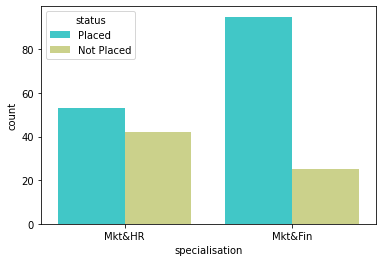

In [156]:
print("specialisation has unique value size of ",len(x["specialisation"].unique()))
print("specialisation's unique values are ",x["specialisation"].unique())
sns.countplot(x = 'specialisation',hue=y,data=x,palette='rainbow');

In [157]:
temp = pd.get_dummies(x["specialisation"], prefix="specialisation")
x = pd.concat([x, temp], axis = 1)
x.drop("specialisation", axis=1,inplace=True)

In [158]:
x.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,1,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,265000.0,0,1,1,0,1,0,0,1,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


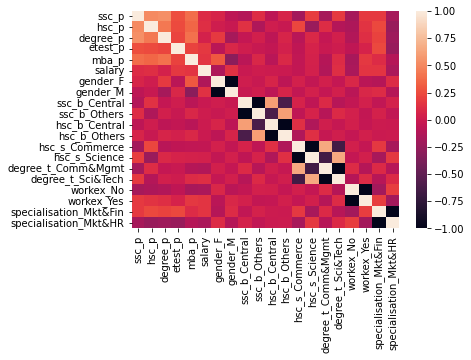

In [159]:
sns.heatmap(x.corr())

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()
x["ssc_p"]=scaler.fit_transform(np.array(df["ssc_p"]).reshape(-1,1))
x["hsc_p"]=scaler.fit_transform(np.array(df["hsc_p"]).reshape(-1,1))
x["degree_p"]=scaler.fit_transform(np.array(df["degree_p"]).reshape(-1,1))
x["etest_p"]=scaler.fit_transform(np.array(df["etest_p"]).reshape(-1,1))
x["mba_p"]=scaler.fit_transform(np.array(df["mba_p"]).reshape(-1,1))
x["salary"]=scaler.fit_transform(np.array(df["salary"]).reshape(-1,1))

In [162]:
x.isnull().sum()

ssc_p                      0
hsc_p                      0
degree_p                   0
etest_p                    0
mba_p                      0
salary                    67
gender_F                   0
gender_M                   0
ssc_b_Central              0
ssc_b_Others               0
hsc_b_Central              0
hsc_b_Others               0
hsc_s_Commerce             0
hsc_s_Science              0
degree_t_Comm&Mgmt         0
degree_t_Sci&Tech          0
workex_No                  0
workex_Yes                 0
specialisation_Mkt&Fin     0
specialisation_Mkt&HR      0
dtype: int64

In [183]:
warnings.filterwarnings("ignore")

for i in range(0,x.shape[0]):
  val = x["salary"][i]
  if math.isnan(val): 
    x["salary"][i] = x["salary"].median()

In [164]:
x

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.538240,0.889621,0.195122,0.104167,0.284483,0.094595,0,1,0,1,0,1,1,0,0,1,1,0,0,1
1,0.792414,0.680890,0.670244,0.760417,0.564843,0.000000,0,1,1,0,0,1,0,1,0,1,0,1,1,0
2,0.497011,0.510708,0.341463,0.520833,0.247001,0.067568,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,0.311482,0.247117,0.048780,0.333333,0.308096,0.087838,0,1,1,0,1,0,0,1,0,1,1,0,0,1
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,0,1,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.818594,0.741351,0.673171,0.854167,0.872564,0.270270,0,1,0,1,0,1,1,0,1,0,1,0,1,0
211,0.352711,0.378913,0.536585,0.500000,0.090330,0.101351,0,1,0,1,0,1,0,1,0,1,1,0,1,0
212,0.538240,0.494234,0.560976,0.187500,0.693778,0.128378,0,1,0,1,0,1,1,0,1,0,0,1,1,0
213,0.682540,0.477759,0.195122,0.416667,0.338081,0.005405,1,0,0,1,0,1,1,0,1,0,1,0,0,1


In [165]:
!pip install catboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC


In [167]:
map = {"Placed":0,
       "Not Placed":1}
y.replace(map, inplace=True)
y

0      0
1      0
2      0
3      1
4      0
      ..
210    0
211    0
212    0
213    0
214    1
Name: status, Length: 215, dtype: int64

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [179]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
rf = rf_model.predict(x_test)
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)
gbm = gbm_model.predict(x_test)
xgb_model = XGBClassifier().fit(x_train, y_train)
xgb = xgb_model.predict(x_test)
lgbm_model = LGBMClassifier().fit(x_train, y_train)
lgbm = lgbm_model.predict(x_test)
catb_model = CatBoostClassifier().fit(x_train, y_train)
catb = catb_model.predict(x_test);
knn_model = KNeighborsClassifier().fit(x_train, y_train)
knn = knn_model.predict(x_test);
svc_model = SVC(kernel = "linear").fit(x_train, y_train)
svc = svc_model.predict(x_test);


Learning rate set to 0.004859
0:	learn: 0.6864765	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6829626	total: 3.19ms	remaining: 1.59s
2:	learn: 0.6775161	total: 4.49ms	remaining: 1.49s
3:	learn: 0.6720916	total: 5.79ms	remaining: 1.44s
4:	learn: 0.6662630	total: 7.08ms	remaining: 1.41s
5:	learn: 0.6612936	total: 8.53ms	remaining: 1.41s
6:	learn: 0.6553334	total: 9.82ms	remaining: 1.39s
7:	learn: 0.6491955	total: 11.3ms	remaining: 1.4s
8:	learn: 0.6455053	total: 12.8ms	remaining: 1.41s
9:	learn: 0.6403146	total: 14.3ms	remaining: 1.42s
10:	learn: 0.6356126	total: 15.8ms	remaining: 1.42s
11:	learn: 0.6281996	total: 17.3ms	remaining: 1.43s
12:	learn: 0.6240639	total: 18.8ms	remaining: 1.43s
13:	learn: 0.6180664	total: 20.6ms	remaining: 1.45s
14:	learn: 0.6151239	total: 22.1ms	remaining: 1.45s
15:	learn: 0.6089346	total: 23.6ms	remaining: 1.45s
16:	learn: 0.6052128	total: 25.1ms	remaining: 1.45s
17:	learn: 0.6020145	total: 26.7ms	remaining: 1.46s
18:	learn: 0.5986051	total: 28.1ms	remaining:

In [180]:
print("Random Forest accuracy", accuracy_score(y_test,rf))
print("Gradient Boosting Machine accuracy", accuracy_score(y_test,gbm))
print("XGBoost accuracy: ", accuracy_score(y_test,xgb))
print("Light GBM accuracy: ", accuracy_score(y_test,lgbm))
print("CatBoost accuracy: ", accuracy_score(y_test,catb))
print("KNN accuracy: ", accuracy_score(y_test,knn))
print("SVC accuracy: ", accuracy_score(y_test,svc))


Random Forest accuracy 0.9534883720930233
Gradient Boosting Machine accuracy 0.9767441860465116
XGBoost accuracy:  0.9767441860465116
Light GBM accuracy:  0.9767441860465116
CatBoost accuracy:  0.9767441860465116
KNN accuracy:  0.7441860465116279
SVC accuracy:  0.8604651162790697


In [181]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, rf))

0.21566554640687682